### Analysis of bots for Optiver RTO

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../match_events.csv")
df.tail()

,Time,Competitor,Operation,OrderId,Side,Volume,Price,Lifespan,Fee,FuturePrice,EtfPrice,AccountBalance,FuturePosition,EtfPosition,ProfitLoss,TotalFees,MaxDrawdown,BuyVolume,SellVolume
1872,30.016,ExampleOne,Fill,122.0,B,-1.0,3411.0,GFD,0.68,3413.0,3411.0,-3336.26,33,-32,140.74,47.26,243.26,42,74
1873,30.016,ExampleOne,Hedge,NaN,S,1.0,3412.5,NaN,0.00,3413.0,3411.0,76.24,32,-32,140.24,47.26,243.26,42,74
1874,30.016,ExampleOne,Insert,123.0,S,1.0,3413.0,GFD,0.00,3413.0,3411.0,76.24,32,-32,140.24,47.26,243.26,42,74
1875,30.016,Joel_V2,Cancel,147.0,B,-19.0,3409.0,GFD,0.00,3413.0,3411.0,-4.21,21,-21,37.79,-28.29,77.28,31,52
1876,30.016,Joel_V2,Insert,148.0,B,20.0,3409.0,GFD,0.00,3413.0,3411.0,-4.21,21,-21,37.79,-28.29,77.28,31,52


In [3]:
team_names = ["Safe", "Joel_V1", "Joel_V2", "ExampleOne", "ExampleTwo_V2"]

### Retrieving relevant teams' data

In [4]:
teams_data = []
teams_pl = []
for team in team_names:
    team_data = df[df["Competitor"].str.contains(team)].dropna()
    team_pl = team_data["ProfitLoss"]
    
    teams_data.append(team_data)
    teams_pl.append(team_pl)

### Diagrams

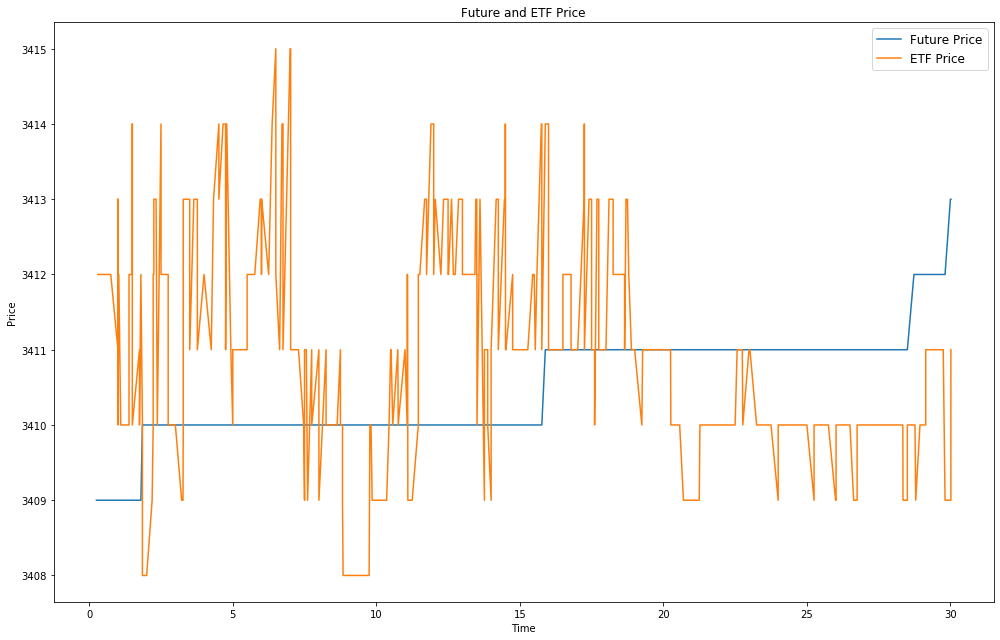

In [5]:
plt.figure(figsize=(14, 9))
plt.plot(df["Time"], df["FuturePrice"], label="Future Price")
plt.plot(df["Time"], df["EtfPrice"], label="ETF Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Future and ETF Price")
plt.legend(prop={'size': 12})
plt.tight_layout()
plt.show()

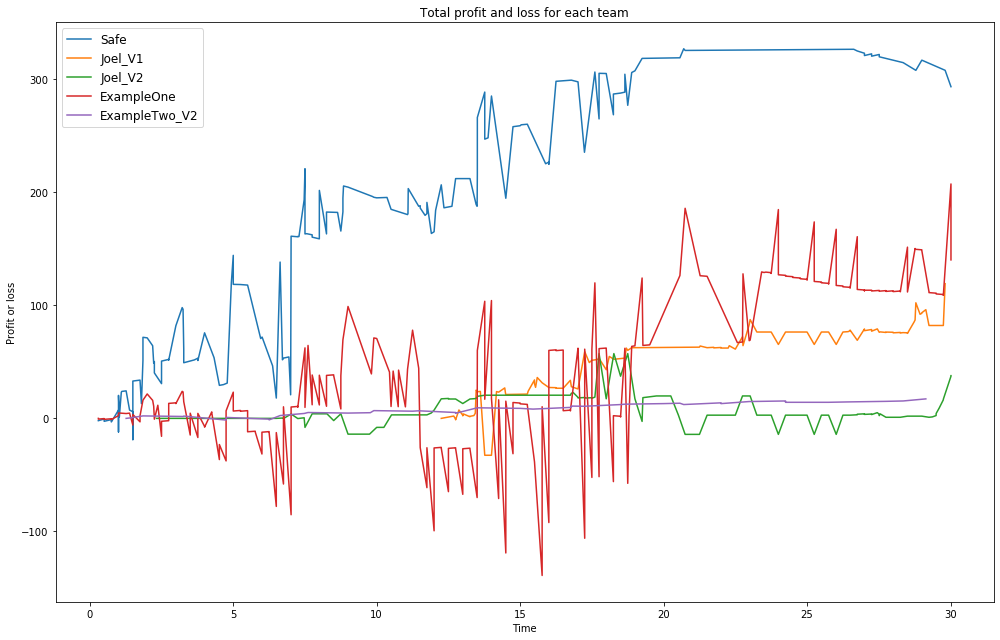

In [6]:
plt.figure(figsize=(14, 9))
for team in range(len(team_names)):
    plt.plot(teams_data[team]["Time"], teams_pl[team], label=team_names[team])
plt.xlabel("Time")
plt.ylabel("Profit or loss")
plt.title("Total profit and loss for each team")
plt.legend(prop={'size': 12})
plt.tight_layout()
plt.show()

In [7]:
# Final profit or loss for each team
print(f"Final p&l for each team: ")
for team in range(len(team_names)):
    print(f"{team_names[team]}: {teams_pl[team].iloc[-1]}")

Final p&l for each team: 
Safe: 293.48
Joel_V1: 119.21
Joel_V2: 37.79
ExampleOne: 140.24
ExampleTwo_V2: 17.24


### Retrieving key data for bots

#### Win percentage

In [8]:
teams_win_pct = []
for team in range(len(team_names)):
    team_win_pct = [0]
    for t in range(1, len(teams_data[team]["Time"])):
        team_win_pct.append(sum(teams_pl[team].iloc[:t].diff() > 0)/len(teams_pl[team].iloc[:t].diff()))
    teams_win_pct.append(team_win_pct)

#### Average win

In [9]:
teams_avg_win = []
for team in range(len(team_names)):
    team_avg_win = [0]
    for t in range(1, len(teams_data[team]["Time"])):
        team_avg_win.append(np.average(teams_pl[team].iloc[:t].diff()[teams_pl[team].iloc[:t].diff() > 0]))
    teams_avg_win.append(team_avg_win)

e:\virtualenv\ml\lib\site-packages\numpy\lib\function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
e:\virtualenv\ml\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


#### Average loss

In [10]:
teams_avg_loss = []
for team in range(len(team_names)):
    team_avg_loss = [0]
    for t in range(1, len(teams_data[team]["Time"])):
        team_avg_loss.append(np.average(teams_pl[team].iloc[:t].diff()[teams_pl[team].iloc[:t].diff() < 0]))
    teams_avg_loss.append(team_avg_loss)

#### Expectancy

In [11]:
teams_exp = []
for team in range(len(team_names)):
    team_exp = [0]
    for t in range(1, len(teams_data[team]["Time"])):
        team_exp.append((sum(teams_pl[team].iloc[:t].diff()[teams_pl[team].iloc[:t].diff() > 0]) +
                         sum(teams_pl[team].iloc[:t].diff()[teams_pl[team].iloc[:t].diff() < 0]))/
                        teams_data[team].iloc[:t]["OrderId"].iloc[-1])
    teams_exp.append(team_exp)

### Analysis

#### Win percentage

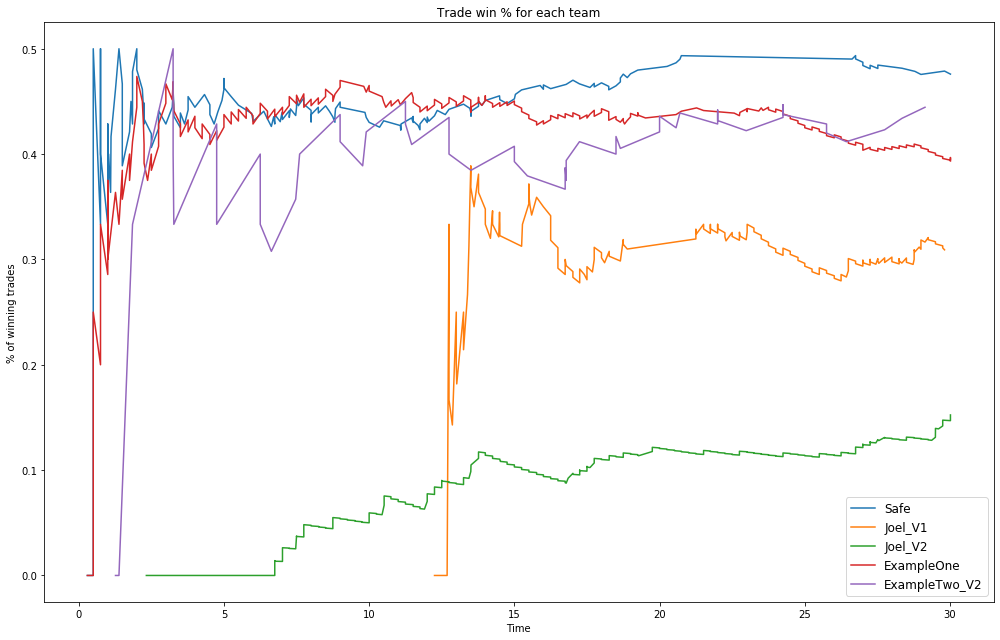

In [12]:
plt.figure(figsize=(14, 9))
for team in range(len(team_names)):
    plt.plot(teams_data[team]["Time"], teams_win_pct[team], label=team_names[team])
plt.xlabel("Time")
plt.ylabel("% of winning trades")
plt.title("Trade win % for each team")
plt.legend(prop={'size': 12})
plt.tight_layout()
plt.show()

#### Average win

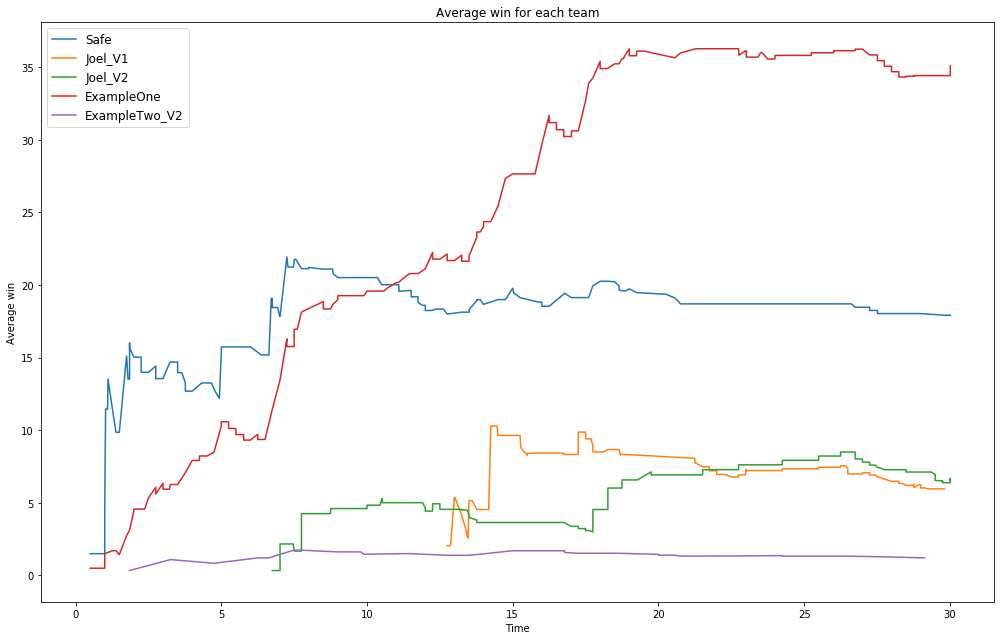

In [13]:
plt.figure(figsize=(14, 9))
for team in range(len(team_names)):
    plt.plot(teams_data[team]["Time"], teams_avg_win[team], label=team_names[team])
plt.xlabel("Time")
plt.ylabel("Average win")
plt.title("Average win for each team")
plt.legend(prop={'size': 12})
plt.tight_layout()
plt.show()

#### Average loss

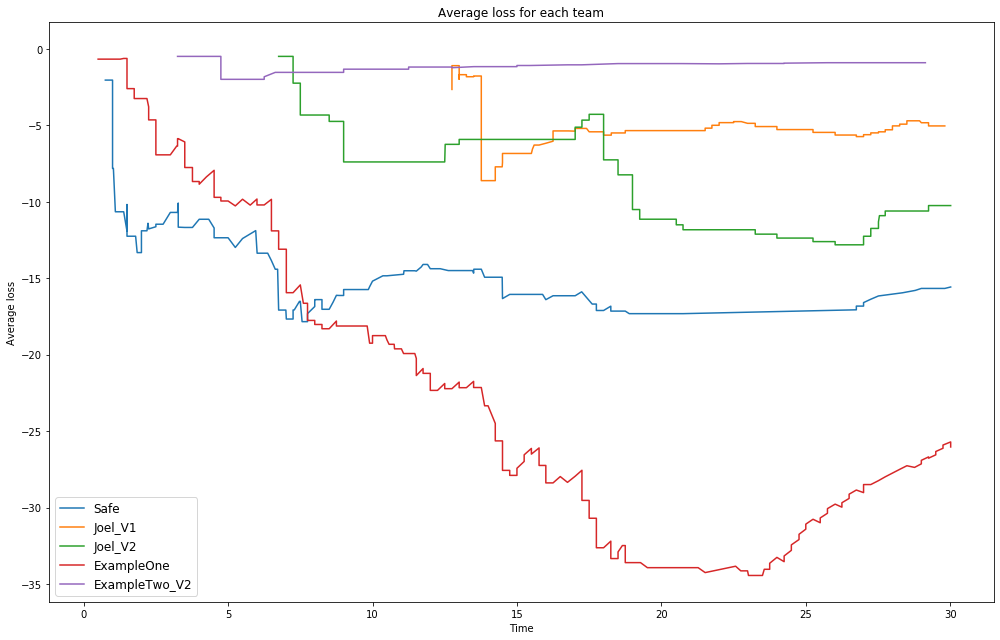

In [14]:
plt.figure(figsize=(14, 9))
for team in range(len(team_names)):
    plt.plot(teams_data[team]["Time"], teams_avg_loss[team], label=team_names[team])
plt.xlabel("Time")
plt.ylabel("Average loss")
plt.title("Average loss for each team")
plt.legend(prop={'size': 12})
plt.tight_layout()
plt.show()

#### Expectancy

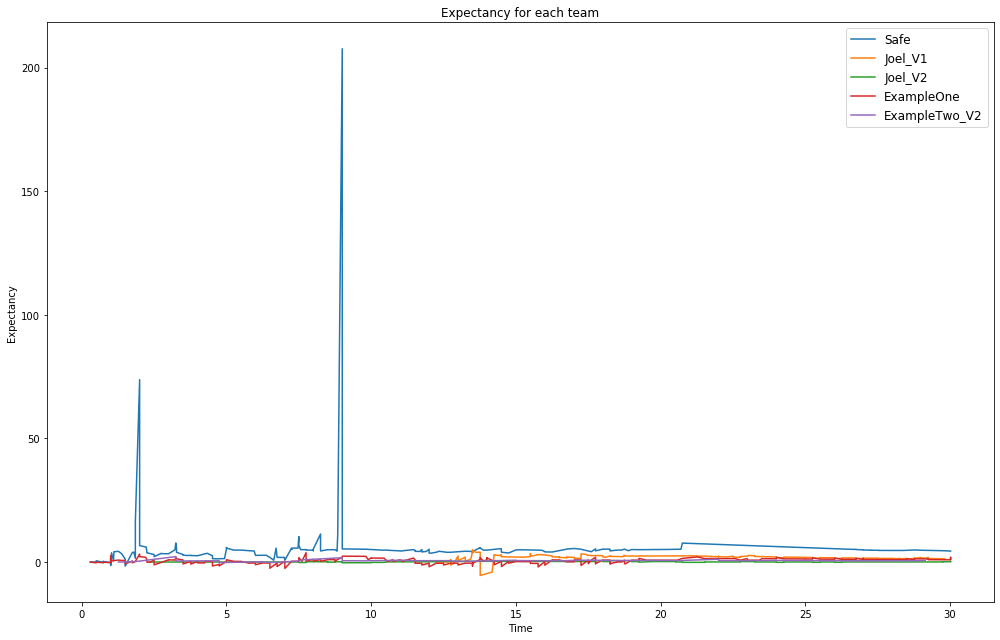

In [15]:
plt.figure(figsize=(14, 9))
for team in range(len(team_names)):
    plt.plot(teams_data[team]["Time"], teams_exp[team], label=team_names[team])
plt.xlabel("Time")
plt.ylabel("Expectancy")
plt.title("Expectancy for each team")
plt.legend(prop={'size': 12})
plt.tight_layout()
plt.show()

#### Max Drawdown

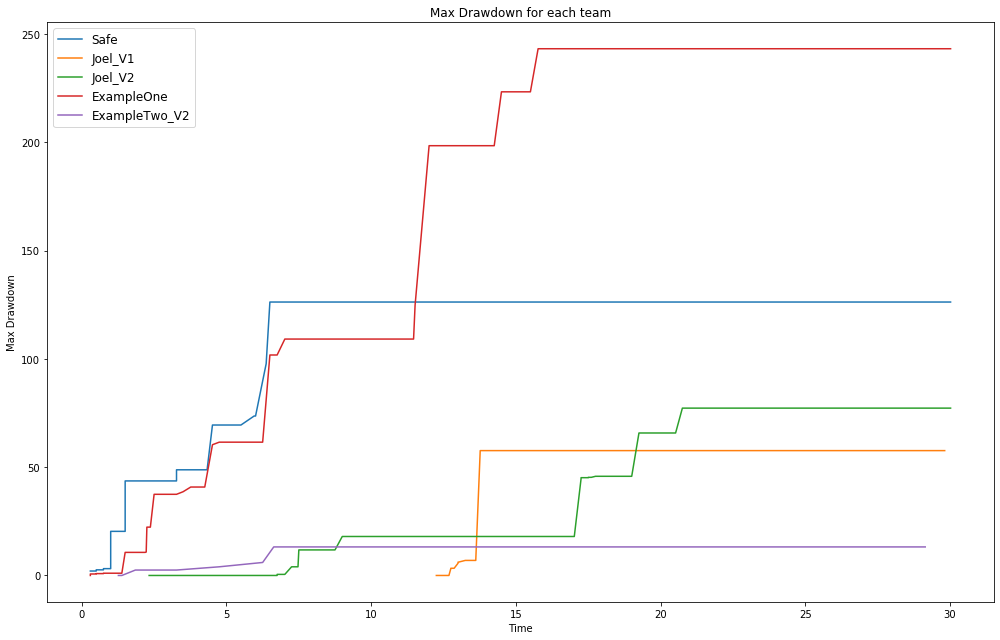

In [16]:
plt.figure(figsize=(14, 9))
for team in range(len(team_names)):
    plt.plot(teams_data[team]["Time"], teams_data[team]["MaxDrawdown"], label=team_names[team])
plt.xlabel("Time")
plt.ylabel("Max Drawdown")
plt.title("Max Drawdown for each team")
plt.legend(prop={'size': 12})
plt.tight_layout()
plt.show()